# MNIST - Categorical Classification
> # Overfitting Issue
## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.16.1'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

''

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

* GPU 종류 확인

In [28]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1273209957555868365
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8000151715602274491
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [29]:
!nvidia-smi

Mon Jan 15 08:19:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0              28W /  70W |    387MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [30]:
tf.test.is_gpu_available()

True

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [31]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [32]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


* Test_Data Information

In [33]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

* matplotlib

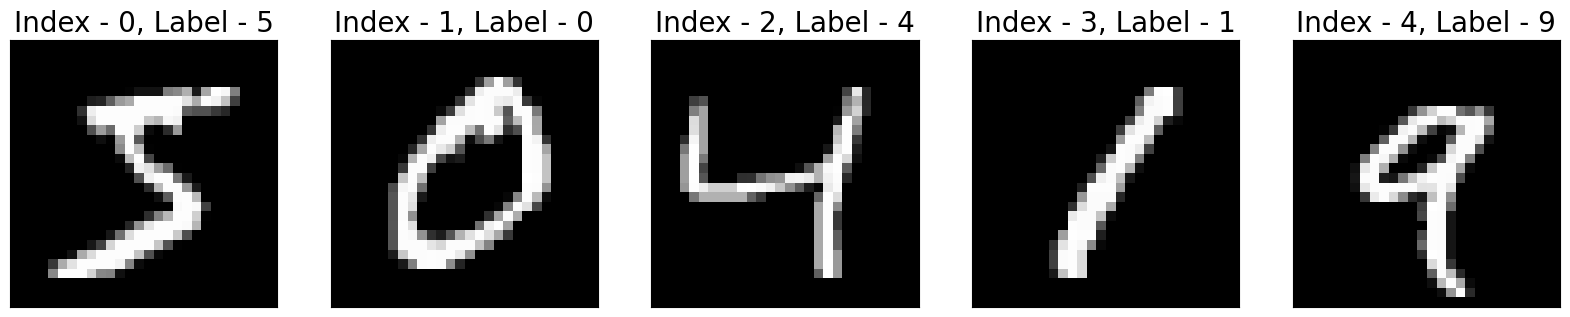

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

* NumPy Array

In [35]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [36]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [37]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 784)

In [38]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [39]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [46]:
train_test_split?

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [43]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [44]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [47]:
mnist.fit?

In [45]:
# %%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)
                    #    validation_data = (X_valid, y_valid))

Epoch 1/50
300/300 [==============================] - 3s 5ms/step - loss: 0.2761 - accuracy: 0.9200 - val_loss: 0.1458 - val_accuracy: 0.9546
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.1006 - val_accuracy: 0.9683
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9803 - val_loss: 0.0910 - val_accuracy: 0.9727
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.0839 - val_accuracy: 0.9751
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0893 - val_accuracy: 0.9729
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0865 - val_accuracy: 0.9750
Epoch 7/50
300/300 [==============================] - 2s 5ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0890 - val_accuracy: 0.9762
Epoch 

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

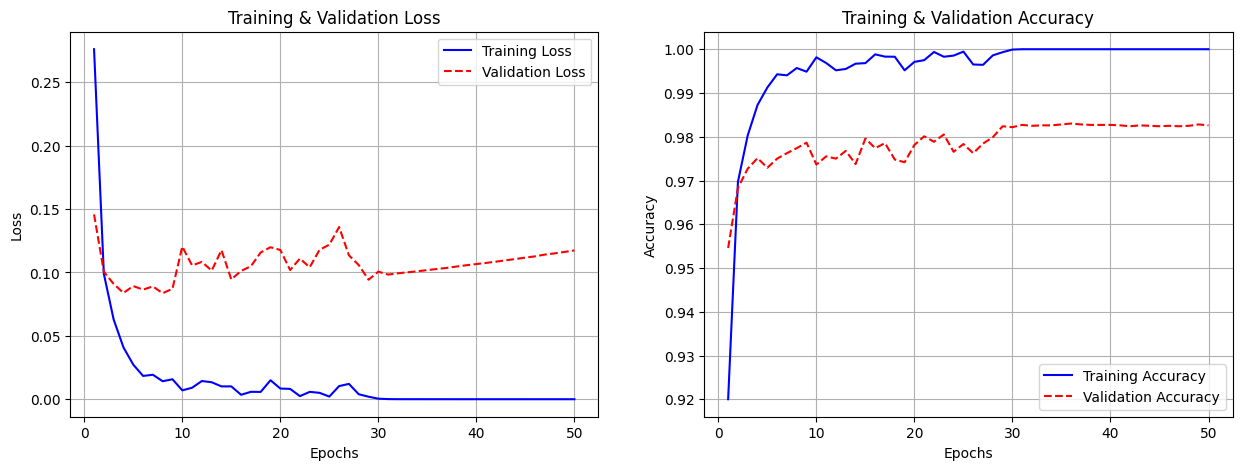

In [48]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [49]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.11924
Accuracy = 0.98270


> ## 6) Model Predict

* Probability

In [50]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [51]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


> ## 7) Image Visualization

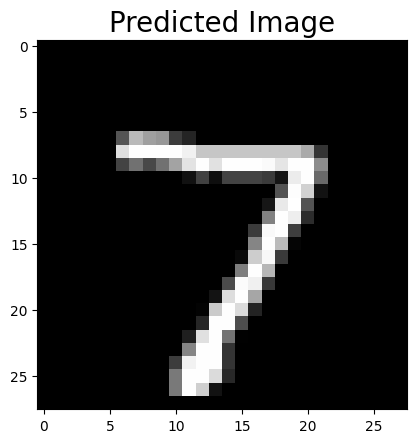

In [52]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

In [53]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [55]:
mnist.predict(X_test, verbose = 0)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

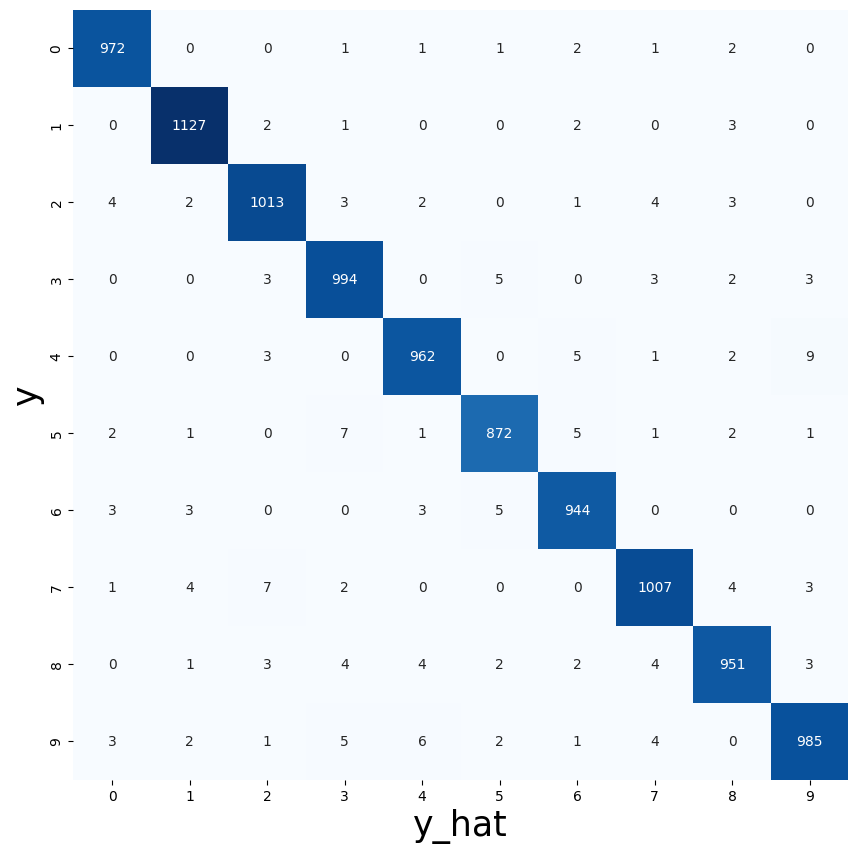

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1), # y true
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) # y pred

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [58]:
from sklearn.metrics import classification_report

print('\n',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 1)  model capacity 줄이기

In [59]:
mnist1 = models.Sequential()
mnist1.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist1.add(layers.Dense(10, activation = 'softmax'))

In [60]:
mnist1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
mnist1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [64]:
# %%time

Hist_mnist1 = mnist1.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9874 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9909 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 0.0876 - val_accuracy: 0.9743
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9951 - val_loss: 0.0859 - val_accuracy: 0.9752
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9960 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0131 - accuracy: 0.9973 - val_loss: 0.0943 - val_accuracy: 0.9730
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0115 - accuracy: 0.9976 - val_loss: 0.0869 - val_accuracy: 0.9771
Epoch 

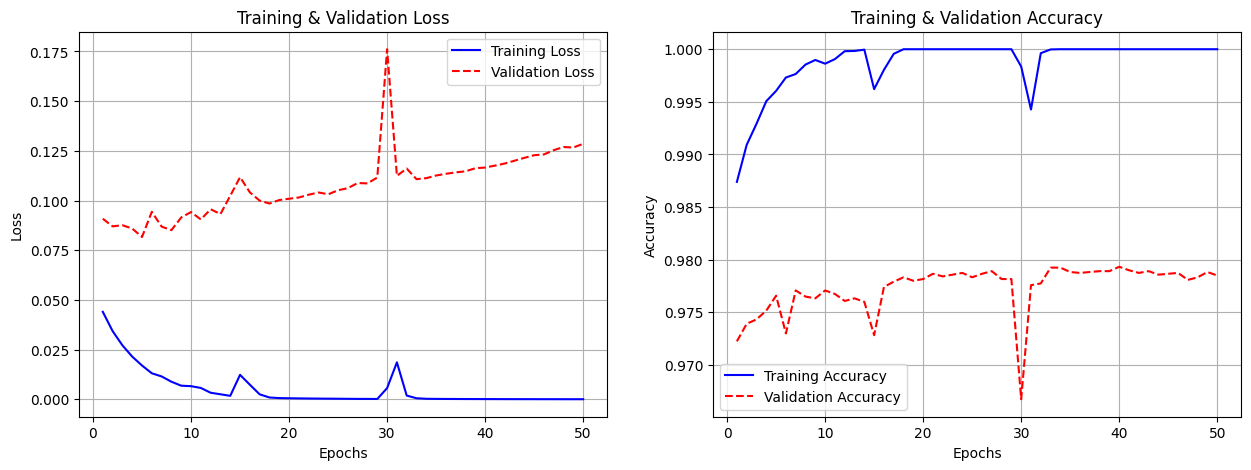

In [65]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist1.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist1.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist1.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization
- https://wooono.tistory.com/221
- L1 Regularization 의 개념에서 가장 중요한 것은 cost function 에 가중치의 절대값을 더해준다는 것
- 기존의 cost function 에 가중치의 제곱을 더함으로써 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.
L1 Loss, L2 Loss 의 차이
L2 Loss 는 직관적으로 오차의 제곱을 더하기 때문에 Outlier 에 더 큰 영향을 받습니다.
"L1 Loss 가 L2 Loss 에 비해 Outlier 에 대하여 더 Robust(덜 민감 혹은 둔감) 하다." 라고 표현 할 수 있습니다.
Outlier 가 적당히 무시되길 원한다면 L1 Loss 를 사용하고
Outlier 의 등장에 신경써야 하는 경우라면 L2 Loss 를 사용하는 것이 좋겠습니다.
L1 Loss 는 0인 지점에서 미분이 불가능하다는 단점 또한 가지고 있습니다.

L1 Regularization, L2 Regularization 의 차이와 선택 기준
L1 Regularization은 가중치 업데이트 시, 가중치의 크기에 상관 없이 상수값을 빼면서 진행됩니다.

때문에 작은 가중치들은 거의 0으로 수렴 되어, 몇개의 중요한 가중치들만 남게 됩니다.

그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 sparse model 같은 경우에는 L1 Regularization이 효과적입니다.

다만, L1 Regularization은 아래 그림처럼 미분 불가능한 점이 있기 때문에 Gradient-base learning 에는 주의가 필요합니다.


L2 Regularization은 가중치 업데이트 시, 가중치의 크기가 직접적인 영향을 미칩니다.

따라서, L2는 L1 보다 가중치 규제에 좀 더 효과적입니다.

In [66]:
layers.Dense?

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R = models.Sequential()
mnist_L2R.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))
mnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_H = mnist_L2R.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.2578 - accuracy: 0.9240 - val_loss: 0.1423 - val_accuracy: 0.9613
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9714 - val_loss: 0.1229 - val_accuracy: 0.9673
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9801 - val_loss: 0.1007 - val_accuracy: 0.9747
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9865 - val_loss: 0.0910 - val_accuracy: 0.9770
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 0.1085 - val_accuracy: 0.9746
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9913 - val_loss: 0.1016 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9931 - val_loss: 0.1077 - val_accuracy: 0.9789

==== L2 Regularization ====


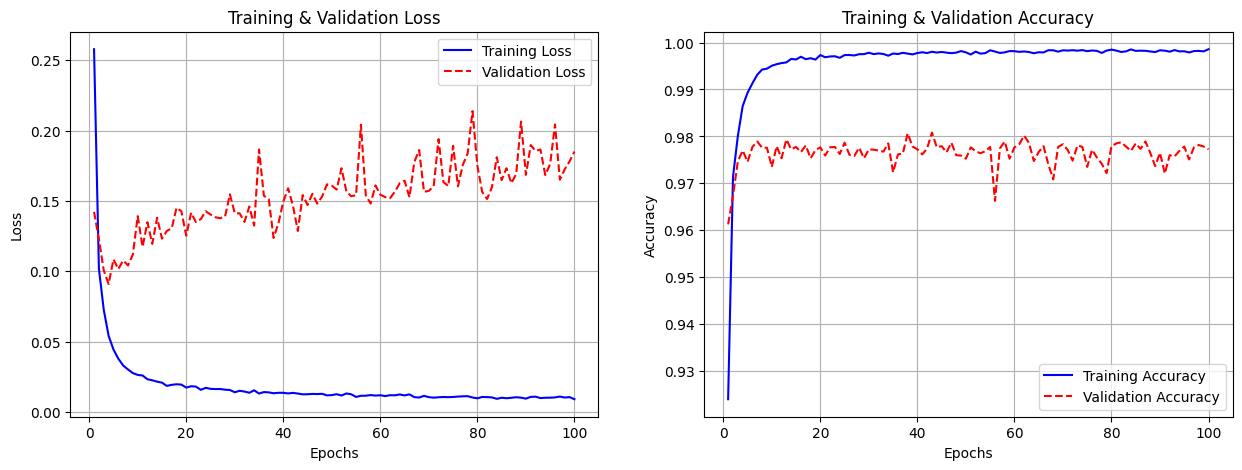

In [ ]:
import matplotlib.pyplot as plt
print('==== L2 Regularization ====')

epochs = range(1, len(mnist_L2R_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Drop out

In [ ]:

mnist_D = models.Sequential()
mnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_D.add(layers.Dropout(0.4))
mnist_D.add(layers.Dense(256, activation = 'relu'))
mnist_D.add(layers.Dropout(0.2))
mnist_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time
mnist_D_H = mnist_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.9009 - val_loss: 0.1463 - val_accuracy: 0.9566
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9568 - val_loss: 0.1070 - val_accuracy: 0.9693
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9658 - val_loss: 0.1041 - val_accuracy: 0.9715
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.1023 - val_accuracy: 0.9728
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0913 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0925 - val_accuracy: 0.9760
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.0899 - val_accuracy: 0.9770

==== Drop Out ====


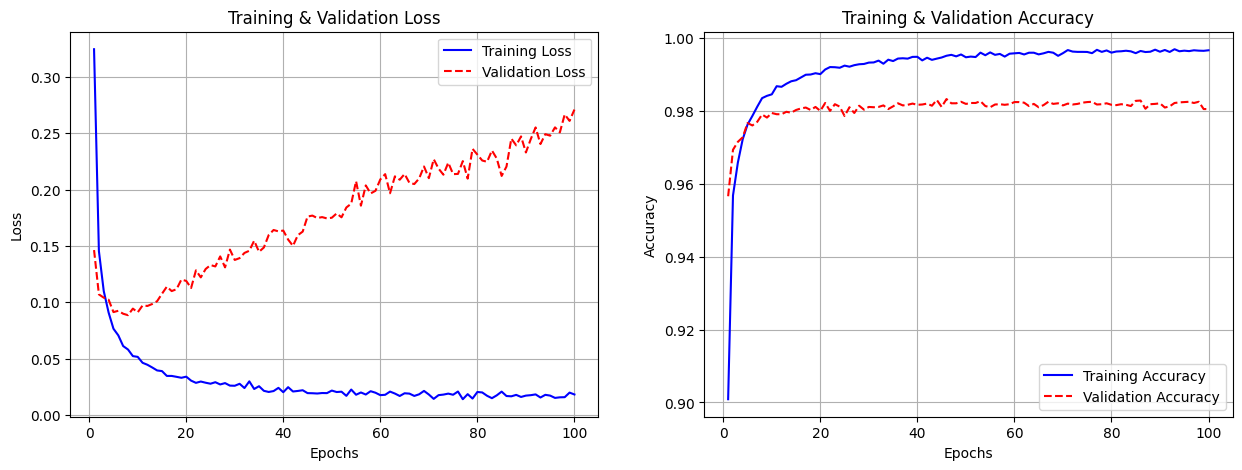

In [ ]:
import matplotlib.pyplot as plt
print('==== Drop Out ====')

epochs = range(1, len(mnist_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization

In [ ]:
mnist_BN = models.Sequential()
mnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(256 ))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_BN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256)              

In [ ]:
mnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_BN_H = mnist_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9467 - val_loss: 0.1257 - val_accuracy: 0.9615
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.1047 - val_accuracy: 0.9722
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0875 - val_accuracy: 0.9765
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0988 - val_accuracy: 0.9749
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0877 - val_accuracy: 0.9781
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.1027 - val_accuracy: 0.9770

In [ ]:
import matplotlib.pyplot as plt
print('==== Batch Normalization ====')

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

==== Batch Normalization ====


NameError: name 'mnist_BN_H' is not defined

# loss 결과 비교

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====')


plt.subplot(4, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Model Capacity - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Model Capacity - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 3)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('L2 Regularization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('L2 Regularization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 5)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Drop Out - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Drop Out - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()



plt.subplot(4, 2, 7)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Batch Normalization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Batch Normalization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

NameError: name 'mnist_BN_H' is not defined

# Batch Normalization & Drop out

In [ ]:
mnist_BN_D = models.Sequential()

mnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))

mnist_BN_D.add(layers.Dense(256 ))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))
mnist_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_BN_D.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [ ]:
mnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_BN_D_H = mnist_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.3195 - accuracy: 0.9022 - val_loss: 0.1508 - val_accuracy: 0.9538
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1636 - accuracy: 0.9502 - val_loss: 0.1320 - val_accuracy: 0.9621
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 0.1274 - accuracy: 0.9604 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 4/100
375/375 [==============================] - 4s 9ms/step - loss: 0.1088 - accuracy: 0.9665 - val_loss: 0.0917 - val_accuracy: 0.9745
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0948 - accuracy: 0.9704 - val_loss: 0.0920 - val_accuracy: 0.9754
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0924 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0805 - accuracy: 0.9749 - val_loss: 0.0905 - val_accuracy: 0.977

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

NameError: name 'history_model' is not defined

# L2 Regularization & Drop out

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_D = models.Sequential()
mnist_L2R_D.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_D.add(layers.Dropout(0.4))
mnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_D.add(layers.Dropout(0.2))
mnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_D.summary()

In [ ]:
mnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_D_H = mnist_L2R_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN = models.Sequential()
mnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))


mnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))

mnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN.summary()

In [ ]:
mnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_H = mnist_L2R_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization & Drop out

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN_D = models.Sequential()
mnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.4))

mnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.2))

mnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN_D.summary()

In [ ]:
mnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_D_H = mnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 조합 loss 결과 비교

In [ ]:
model_h_list = ['mnist_L2R_BN_H', 'mnist_L2R_D_H', 'mnist_BN_D_H', 'mnist_L2R_BN_D_H']
model_h_vlist = [mnist_L2R_BN_H, mnist_L2R_D_H, mnist_BN_D_H, mnist_L2R_BN_D_H]

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====', fontsize=20)


for i in range(len(model_h_list)):
    plt.subplot(len(model_h_list), int(len(model_h_list)/2), i+1)
    plt.plot(epochs, model_h_vlist[i].history['loss'], 'b-')
    plt.plot(epochs, model_h_vlist[i].history['val_loss'], 'r--')
    plt.title(f'{model_h_list[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# The End